In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [2]:
from varMergeMethod import varMergeByPct, varMergeByChiSquare, varMergeByIVSplit, categoryToWOE

In [3]:
# 本例数据来源：https://www.kaggle.com/c/walmart-recruiting-trip-type-classification/data
dat = pd.read_csv('./data/train.csv', dtype={'TripType':'category'
                                             ,'VisitNumber':object
                                             , 'Upc':object
                                             , 'FinelineNumber':object})

dat2 = dat.dropna(axis=0, how='any') # 去除空值

###  1. 种类变量之间有顺序关系:map | LabelEncoder | OrdinalEncoder

In [4]:
dat3 = dat2.copy() # 防止出现DataFrame设置值的Warning

weekday_mapper = {
    "Monday":1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
}

wm_map = dat2.Weekday.map(weekday_mapper) #用map可以随心指定顺序
dat3.loc[:,'Weekday_mapper'] = wm_map

# 可以用LabelEncoder或者OrdinalEncoder,但是转换后的数字是按类出现的顺序排序的
wm_le = LabelEncoder().fit_transform(dat2.Weekday)# 输入参数可以是一维数组
dat3.loc[:, 'Weekday_le'] = wm_le

wm_oe = OrdinalEncoder().fit_transform(dat2[['Weekday']]) # 输入参数必须是二维数组的形式
dat3.loc[:, 'Weekday_oe'] = wm_oe

In [5]:
dat3[[i for i in dat3.columns if 'Weekday' in i]].head()

,Weekday,Weekday_mapper,Weekday_le,Weekday_oe
0,Friday,5,0,0.0
1,Friday,5,0,0.0
2,Friday,5,0,0.0
3,Friday,5,0,0.0
4,Friday,5,0,0.0


### 2. 种类变量之间无顺序关系且种类数目较少： get_dummies 或者 OneHotEncoder

In [6]:
# 1. 使用pd.get_dummies
depart_by_dummies = pd.get_dummies(dat2.DepartmentDescription) 
depart_by_dummies2 = pd.get_dummies(dat2.DepartmentDescription
                        , drop_first=True)  # 丢去第一个变量,防止共线性

In [7]:
depart_by_dummies.head()

,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
depart_by_dummies2.head()

,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# 2. 使用OneHotEncoder
depart_by_ohe = OneHotEncoder(handle_unknown='ignore').fit_transform(dat2[["DepartmentDescription"]]).toarray() # 输入参数必须是二维数组的形式
pd.DataFrame(depart_by_ohe).head()

# from sklearn.compose import ColumnTransformer
# categorical_features = ['DepartmentDescription']
# cat = ColumnTransformer(transformers=[
#     ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])
# tmp2 = cat.fit_transform(dat2).toarray()
# pd.DataFrame(tmp2).head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 将结果和原来数据集合并
dat3 = pd.concat([dat3, depart_by_dummies], axis=1)
# dat3 = pd.concat([dat3, pd.DataFrame(depart_by_ohe)], axis=1)
dat3.drop(columns=['DepartmentDescription'], inplace=True)
dat3.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,FinelineNumber,Weekday_mapper,Weekday_le,Weekday_oe,1-HR PHOTO,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,999,5,Friday,68113152929,-1,1000,5,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,30,7,Friday,60538815980,1,8931,5,0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
2,30,7,Friday,7410811099,1,4504,5,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,8,Friday,2238403510,2,3565,5,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,8,Friday,2006613744,2,1017,5,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. 种类变量之间无顺序关系且种类数目较多： 合并后OneHot | 用WOE代替类别 | Embedding | Hash

#### 3.1 聚类后OneHot

In [11]:
# 先把问题转换为一个2分类的问题， 将TripType分为40和其他类型
dat4 = dat2.copy()
dat4.loc[dat4.TripType!='40', 'Label'] = 0
dat4.loc[dat4.TripType=='40', 'Label'] = 1
dat4.Label.value_counts()
dat4 = dat4[['DepartmentDescription', 'Label']]

In [12]:
dat4.head()

,DepartmentDescription,Label
0,FINANCIAL SERVICES,0.0
1,SHOES,0.0
2,PERSONAL CARE,0.0
3,PAINT AND ACCESSORIES,0.0
4,PAINT AND ACCESSORIES,0.0


In [13]:
m1 = dat4.groupby(['DepartmentDescription'])['Label'].count()
m1 = pd.DataFrame({'total':m1})
m2 = dat4.groupby(['DepartmentDescription'])['Label'].sum()
m2 = pd.DataFrame({'positive_class':m2})
mm = pd.merge(m1, m2, left_index=True, right_index=True, how='inner')
mm['negative_class'] = mm['total'] - mm['positive_class']
mm['positive_pct'] = mm['positive_class'] / mm['total']
mm = mm.drop(columns='total', axis=1)
mm = mm.reset_index()

In [14]:
mm.head()

,DepartmentDescription,positive_class,negative_class,positive_pct
0,1-HR PHOTO,1.0,393.0,0.002538
1,ACCESSORIES,115.0,1203.0,0.087253
2,AUTOMOTIVE,410.0,5004.0,0.075730
3,BAKERY,1693.0,5475.0,0.236189
4,BATH AND SHOWER,544.0,4038.0,0.118725


In [15]:
mm.shape

(68, 4)

#### 3.1.1 合并方法：
方法a) 绘制正样本占比的散点图，肉眼观察分几类合适；或者聚合正样本占比之差接近的类<br>
方法b) 使用聚类算法，例如KMeans<br>
方法c) 先按正样本率从小到大进行排序，再利用Fisher精准检验或者卡方检验合并相近的类别<br>
方法d) 先按正样本率从小到大进行排序，先将所有类别视为一类，利用IV(如果是多分类使用一致性比率)找出最优的二元分割，分为2组，后续不断迭代，直至分裂后的组数达到预先设定的个数<br>

参考BLog：http://blog.sina.com.cn/s/blog_13ec1876a0102x5j3.html

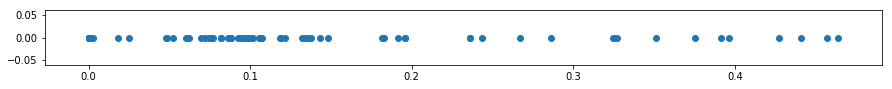

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 1)) 
x = mm.positive_pct.values
y = [0]*mm.shape[0]
ax.scatter(x, y, marker='o')

In [17]:
#mm.sort_values(by='positive_pct')['positive_pct'].values

In [18]:
# a) 观察散点图并进行分类
intervals = [0.03, 0.13, 0.15, 0.20, 0.30, 0.40]

for i in range(len(intervals)+1):
    if i == 0:
        mm.loc[mm.positive_pct<intervals[i], 'GroupByScatter'] = i
    elif i == len(intervals):
        mm.loc[mm.positive_pct>=intervals[i-1], 'GroupByScatter'] = i
    else:
        mm.loc[(mm.positive_pct>=intervals[i-1])&(mm.positive_pct<intervals[i]), 'GroupByScatter'] = i
        
scatter_group = dict()
for i in mm['GroupByScatter'].unique():
    scatter_group[i] = list(mm.loc[(mm['GroupByScatter']==i), 'DepartmentDescription'].values)

In [19]:
mm.groupby(['GroupByScatter'])['DepartmentDescription'].count()

GroupByScatter
0.0     9
1.0    32
2.0     6
3.0     5
4.0     5
5.0     7
6.0     4
Name: DepartmentDescription, dtype: int64

In [20]:
scatter_group[6]

['FROZEN FOODS', 'GROCERY DRY GOODS', 'PRE PACKED DELI', 'SEAFOOD']

In [21]:
pct_merge = varMergeByPct(dat4, 'DepartmentDescription', 'Label', bins=7, varOrder=False)

pct_groups = dict()
for i in range(pct_merge.shape[0]):
    v = pct_merge.interval.values[i].split('|')
    pct_groups[i] = v
    mm.loc[mm['DepartmentDescription'].isin(v), 'GroupByPct'] = i

In [22]:
pct_merge

,variable,interval,flag_0,flag_1
0,DepartmentDescription,PHARMACY RX|OTHER DEPARTMENTS|OPTICAL - LENSES...,109271,9672
1,DepartmentDescription,BATH AND SHOWER|SLEEPWEAR/FOUNDATIONS|HOME MAN...,46024,7227
2,DepartmentDescription,BEAUTY|COOK AND DINE|INFANT CONSUMABLE HARDLIN...,53872,12672
3,DepartmentDescription,"PERSONAL CARE|BAKERY|LIQUOR,WINE,BEER|CANDY, T...",54614,17953
4,DepartmentDescription,DSD GROCERY|HOUSEHOLD CHEMICALS/SUPP|PRODUCE|H...,107935,52666
5,DepartmentDescription,MEAT - FRESH & FROZEN|COMM BREAD|DAIRY,41662,26879
6,DepartmentDescription,SEAFOOD|FROZEN FOODS|PRE PACKED DELI|GROCERY D...,55576,46902


In [23]:
# b) 使用KMeans进行分类
from sklearn.cluster import KMeans

estimator = KMeans(n_clusters=7)
estimator.fit(mm[['positive_pct']])
mm['GroupByKMeans'] = estimator.labels_

kmeans_group = dict()
for i in mm['GroupByKMeans'].unique():
    kmeans_group[i] = list(mm.loc[(mm['GroupByKMeans']==i), 'DepartmentDescription'].values)

In [24]:
mm.groupby(['GroupByKMeans']).positive_pct.count()

GroupByKMeans
0     5
1    22
2     5
3     6
4     9
5    16
6     5
Name: positive_pct, dtype: int64

In [25]:
mm.groupby(['GroupByKMeans']).positive_pct.min()

GroupByKMeans
0    0.181433
1    0.048218
2    0.324255
3    0.391498
4    0.000000
5    0.098514
6    0.236150
Name: positive_pct, dtype: float64

In [26]:
mm.groupby(['GroupByKMeans']).positive_pct.max()

GroupByKMeans
0    0.196044
1    0.096839
2    0.375330
3    0.463609
4    0.025290
5    0.148185
6    0.286036
Name: positive_pct, dtype: float64

In [27]:
kmeans_group[6]

['BAKERY',
 'CANDY, TOBACCO, COOKIES',
 'LIQUOR,WINE,BEER',
 'PERSONAL CARE',
 'PETS AND SUPPLIES']

In [28]:
# c) 利用卡方检验合并
chi_merge = varMergeByChiSquare(dat4, 'DepartmentDescription', 'Label', bins=7, sample=None, varOrder=False)

chi_groups = dict()
for i in range(chi_merge.shape[0]):
    v = chi_merge.interval.values[i].split('|')
    chi_groups[i] = v
    mm.loc[mm['DepartmentDescription'].isin(v), 'GroupByChiSquare'] = i

In [29]:
chi_merge

,variable,interval,flag_0,flag_1
0,DepartmentDescription,PHARMACY RX|OTHER DEPARTMENTS|OPTICAL - LENSES...,109271,9672
1,DepartmentDescription,BATH AND SHOWER|SLEEPWEAR/FOUNDATIONS|HOME MAN...,46024,7227
2,DepartmentDescription,BEAUTY|COOK AND DINE|INFANT CONSUMABLE HARDLIN...,53872,12672
3,DepartmentDescription,"PERSONAL CARE|BAKERY|LIQUOR,WINE,BEER|CANDY, T...",54614,17953
4,DepartmentDescription,DSD GROCERY|HOUSEHOLD CHEMICALS/SUPP|PRODUCE|H...,107935,52666
5,DepartmentDescription,MEAT - FRESH & FROZEN|COMM BREAD|DAIRY,41662,26879
6,DepartmentDescription,SEAFOOD|FROZEN FOODS|PRE PACKED DELI|GROCERY D...,55576,46902


In [30]:
mm.GroupByChiSquare.value_counts()

0.0    38
1.0     9
2.0     5
3.0     5
6.0     4
4.0     4
5.0     3
Name: GroupByChiSquare, dtype: int64

In [31]:
# d) 利用IV分割（自上而下）
iv_split = varMergeByIVSplit(dat4, 'DepartmentDescription', 'Label', bins=7, sample=None, varOrder=False)

iv_split_groups = dict()
for i in range(iv_split.shape[0]):
    v = iv_split.interval.values[i].split('|')
    iv_split_groups[i] = v
    mm.loc[mm['DepartmentDescription'].isin(v), 'GroupByIVSplit'] = i

In [32]:
mm.head()

,DepartmentDescription,positive_class,negative_class,positive_pct,GroupByScatter,GroupByPct,GroupByKMeans,GroupByChiSquare,GroupByIVSplit
0,1-HR PHOTO,1.0,393.0,0.002538,0.0,0.0,4,0.0,0.0
1,ACCESSORIES,115.0,1203.0,0.087253,1.0,0.0,1,0.0,1.0
2,AUTOMOTIVE,410.0,5004.0,0.075730,1.0,0.0,1,0.0,1.0
3,BAKERY,1693.0,5475.0,0.236189,4.0,3.0,6,3.0,4.0
4,BATH AND SHOWER,544.0,4038.0,0.118725,1.0,1.0,5,1.0,2.0


In [33]:
#mm.to_csv('category_split.csv', index=False)

In [34]:
# 对原数据集的列进行合并, 假设采用KMeans的分类
dat4_merge_group = pd.merge(dat4, mm[['DepartmentDescription', 'GroupByKMeans']], on='DepartmentDescription')

In [35]:
dat4_merge_group.GroupByKMeans.value_counts()

2    170078
3    161542
5     84900
1     84399
6     72567
0     66544
4      2895
Name: GroupByKMeans, dtype: int64

#### 3.2 WOE编码：将类别转换为数字

In [36]:
woe = categoryToWOE(dat4, 'DepartmentDescription', 'Label', varOrder=False)

In [37]:
processed = pd.merge(dat4, woe, on='DepartmentDescription', how='inner')

In [38]:
processed.head()

,DepartmentDescription,Label,WOE
0,FINANCIAL SERVICES,0.0,-1.978945
1,FINANCIAL SERVICES,0.0,-1.978945
2,FINANCIAL SERVICES,0.0,-1.978945
3,FINANCIAL SERVICES,0.0,-1.978945
4,FINANCIAL SERVICES,0.0,-1.978945


#### 3.3 Embedding (TODO)

#### 3.4 Hash (TODO)